In [34]:
import numpy as np
import gzip

from astropy.utils.data import download_file
from astropy.io import fits
from astropy.table import Table
from astropy.wcs import WCS

import matplotlib.pyplot as plt

from bliss.utils.download_utils import download_file_to_dst

def plot_image(hdu):
    ax = plt.subplot(projection=WCS(hdu.header))
    ax.imshow(hdu.data,cmap='gray',vmin=hdu.data.min(),vmax=hdu.data.min()+(hdu.data.max()-hdu.data.min())/100.)

In [35]:
URLBASE = "https://portal.nersc.gov/cfs/cosmo/data/legacysurvey/dr9"

In [36]:
ra, dec = 336.635, -0.96

Basic (RA, Dec) <--> Brick conversion

In [37]:
survey_bricks_filename = download_file(f"{URLBASE}/south/survey-bricks-dr9-south.fits.gz", cache=True, show_progress=True, timeout=120)

# ra1 - lower RA boundary
# ra2 - upper RA boundary
# dec1 - lower Dec boundary
# dec2 - upper Dec boundary
survey_bricks = Table.read(survey_bricks_filename)
brickname = survey_bricks[
            (survey_bricks["ra1"] <= ra)
            & (survey_bricks["ra2"] >= ra)
            & (survey_bricks["dec1"] <= dec)
            & (survey_bricks["dec2"] >= dec)
        ]["brickname"][0]
print(f"Brick for RA, Dec ({ra}, {dec}):", brickname)

Brick for RA, Dec (336.635, -0.96): 3366m010


Get images

In [5]:
image_g_filename = download_file("{}/south/coadd/{}/{}/legacysurvey-{}-image-g.fits.fz".format(URLBASE, brickname[:3], brickname, brickname), cache=False)
image_r_filename = download_file("{}/south/coadd/{}/{}/legacysurvey-{}-image-r.fits.fz".format(URLBASE, brickname[:3], brickname, brickname), cache=False)
image_z_filename = download_file("{}/south/coadd/{}/{}/legacysurvey-{}-image-z.fits.fz".format(URLBASE, brickname[:3], brickname, brickname), cache=False)

In [6]:
image_g = fits.open(image_g_filename)
image_r = fits.open(image_r_filename)
image_z = fits.open(image_z_filename)

Get background (via `ccdskycounts`) or `*sky` fields in `ccds-annotated-decam-dr9.fits.gz` summary file

In [ ]:
ccds_filename = download_file(f"{URLBASE}/south/coadd/{brickname[:3]}/{brickname}/legacysurvey-{brickname}-ccds.fits", cache=False, show_progress=True, timeout=120)
ccds = Table.read(ccds_filename)

In [ ]:
ccds_g = ccds[ccds["filter"] == 'g']
ccds_r = ccds[ccds["filter"] == 'r']
ccds_z = ccds[ccds["filter"] == 'z']

median_sky_nelec_g = np.median(ccds_g["ccdskycounts"])
median_sky_nelec_r = np.median(ccds_r["ccdskycounts"])
median_sky_nelec_z = np.median(ccds_z["ccdskycounts"])

print("Median sky background in g band (nelec):", median_sky_nelec_g)
print("Median sky background in r band (nelec):", median_sky_nelec_r)
print("Median sky background in z band (nelec):", median_sky_nelec_z)

# ccds.show_in_notebook(display_length=5)

ccds_g.show_in_notebook()

## DES

Try SIA service to get raw images via `proctype=="InstCal"` for DES images

In [12]:
# std lib
from getpass import getpass
import warnings  
from astropy.utils.exceptions import AstropyWarning
warnings.simplefilter('ignore', category=AstropyWarning) # to quiet Astropy warnings

# 3rd party
import numpy as np
from numpy.core.defchararray import startswith
import pylab as plt
import matplotlib
%matplotlib inline

from pyvo.dal import sia
from astropy.utils.data import download_file
from astropy.io import fits
from astropy.wcs import WCS
from astropy.visualization import make_lupton_rgb

# Data Lab
from dl import queryClient as qc, storeClient as sc, authClient as ac

In [169]:
# DECam images from Legacy Survey DR7
# DEF_ACCESS_URL = "https://datalab.noirlab.edu/sia/ls_dr9"
DEF_ACCESS_URL = "https://datalab.noirlab.edu/sia/calibrated_all"
svc = sia.SIAService(DEF_ACCESS_URL)

In [170]:
ra = 336.6643042496718
dec = -0.9316385797930247

In [173]:
imgTable = svc.search((ra,dec), (2048, 1489)).to_table()

In [ ]:
imgTable.show_in_notebook()

In [175]:
decam = (imgTable["instrument_name"] == "DECam")
calibrated = (imgTable["proctype"] == "InstCal")
band = (imgTable["obs_bandpass"] == "g")
image = (imgTable["prodtype"] == "image")
sel = decam & calibrated & band & image

In [ ]:
imgTable[sel].show_in_notebook(display_length=5)

In [178]:
filename = download_file(imgTable[sel][0]["access_url"], cache=True, show_progress=True, timeout=120)

In [179]:
fitsfile = fits.open(filename)
fitsfile

In [181]:
hdu0 = fitsfile[0]
image = hdu0.data
hdr = hdu0.header

In [ ]:
hdr

In [184]:
image.shape

(4094, 2046)

## Inspect SDSS

Inspect SDSS images and catalog

In [162]:
fitsfile = fits.open("/home/zhteoh/871-decals-e2e/data/sdss/94/1/12/frame-g-000094-1-0012.fits")

In [163]:
hdu0 = fitsfile[0]
hdu1 = fitsfile[1]
hdu2 = fitsfile[2]
hdu3 = fitsfile[3]

In [ ]:
hdu0.header

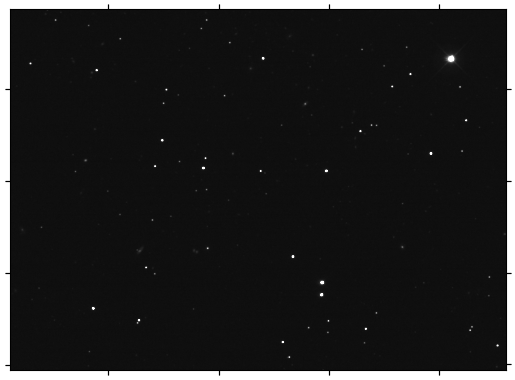

In [164]:
plot_image(hdu0)